In [102]:
import pandas as pd
from scipy import stats

In [103]:
df = pd.read_csv(r'C:\Users\YUCHENG WANG\Desktop\MBAN Summer\MBAN6110\Data\midterm_data.csv')

Data cleaning part

In [104]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [106]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [107]:
# We can use a simple filter to check if any row has all column data missing

df[df['userID'].isnull() & df['age'].isnull() & df['sessions'].isnull() & df['time_spent'].isnull()& df['pages_visited'].isnull()& df['cart_items'].isnull()
& df['cart_value'].isnull()& df['checkout_status'].isnull() & df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location


In [108]:
# The above yielded no rows, let's check situations where we have device& location
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [109]:
# Let's check our data statistics now
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Now let's check what would happen if we fill in missing device and location data with "Other". First, we'll make a copy of our DataFrame - we want to test the output of this approach before making a final decision.

In [110]:
df_test = df.copy()

In [111]:
# Obtain descriptive statistics by location using groupby()
df_test.groupby('location').describe()

userID                                                           
             count         mean          std  min      25%     50%     75%   
location                                                                     
Location 1   979.0  2428.888662  1460.439111  1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983  4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060  2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379  3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326  6.0  1352.50  2664.0  3849.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  

[5 rows x 64 columns]

In [112]:
# Fill in missing location data with "Other" and compare statistics
df_test['location'] = df_test['location'].fillna('Other')

In [113]:
df_test.groupby('location').describe()

userID                                                            
             count         mean          std   min      25%     50%     75%   
location                                                                      
Location 1   979.0  2428.888662  1460.439111   1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983   4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060   2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379   3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326   6.0  1352.50  2664.0  3849.0   
Other         30.0  2346.933333  1288.226445  60.0  1491.50  2295.0  3308.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   
Other       4951.0    30.0  43.233333  ...   196.3700  243.39            30.0   

                                                          
                mean       std  min  25%  50%   75%  max  
location                                                  
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.00  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.00  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.00  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.00  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.00  1.0  
Other       0.266667  0.449776  0.0  0.0  0.0  0.75  1.0  

[6 rows x 64 columns]

In the above, I'm comparing the characteristics of the "Other" location with the remaining locations. It seems that the statistics are quite similar. We have roughly 30 entries, the mean, standard deviation, distribution, median, and quartiles are in and around what the other locations have, for cart_value and checkout_status. I don't think this is creating much bias in our data. 

Now let's compare what happens if we use "location_4", the mode, to fill in the data. We will make another test DataFrame.

In [114]:
df_test_2 = df.copy()

In [115]:
df_test_2['location'] = df_test_2['location'].fillna('Location 4')

In [116]:
df_test_2.groupby('location').describe()

userID                                                           
             count         mean          std  min      25%     50%     75%   
location                                                                     
Location 1   979.0  2428.888662  1460.439111  1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983  4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060  2.0  1248.25  2378.5  3712.5   
Location 4  1086.0  2504.164825  1465.315481  3.0  1221.25  2512.5  3781.5   
Location 5   971.0  2598.049434  1434.875326  6.0  1352.50  2664.0  3849.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1086.0  40.957643  ...   199.5050  353.80          1086.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.283610  0.450957  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  

[5 rows x 64 columns]

Here we can see that the characteristics of location 4 changed somewhat drastically. The average checkout_status from 0.451194 to 0.450957; the median age from 2517.5 to 2512.5. 
Based on this, it's better to create a new category called "Other" so we don't adjust the characteristics of other columns. 
Let's go ahead and change the original DataFrame.

In [117]:
df['location'] = df['location'].fillna('Other')

let's repeat the same process for devices.First let's check the characteristics with filling in with "Other" vs. "Desktop".

In [118]:
df.groupby('device').describe()

userID                                                            
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2538.0  2481.464933  1435.264432  1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

In [119]:
df_test['device'] = df_test['device'].fillna('Other')
df_test_2['device'] = df_test_2['device'].fillna('Desktop')

In [120]:
df_test.groupby('device').describe()

userID                                                             
          count         mean          std   min      25%     50%      75%   
device                                                                      
Desktop  2538.0  2481.464933  1435.264432   1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581   7.0  1236.75  2512.5  3807.75   
Other     100.0  2408.850000  1379.665626  80.0  1232.00  2343.0  3538.25   
Tablet    934.0  2534.595289  1452.234322   5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Other    4988.0   100.0  41.070000  ...   192.7525  302.48           100.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Other    0.220000  0.416333  0.0  0.0  0.0  0.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[4 rows x 64 columns]

In [121]:
df_test_2.groupby('device').describe()

userID                                                            
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2638.0  2478.712282  1433.010644  1.0  1259.25  2494.5  3720.50  \
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2638.0  41.328658  ...   197.0025  427.40          2638.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.282790  0.450441  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

Here we can see that the characteristics of desktop changed somewhat slightly. The average checkout_status from 0.285264 to 0.282790; 
Based on this, it's better to create a new category called "Other" so we don't adjust the characteristics of other columns. 
Let's go ahead and change the original DataFrame.

In [122]:
df['device'] = df['device'].fillna('Other')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           5000 non-null   object 
 9   location         5000 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


Now there's no missing data in our dataser, then we'll check about the outliers.

In [124]:
import seaborn as sns

<Axes: ylabel='cart_value'>

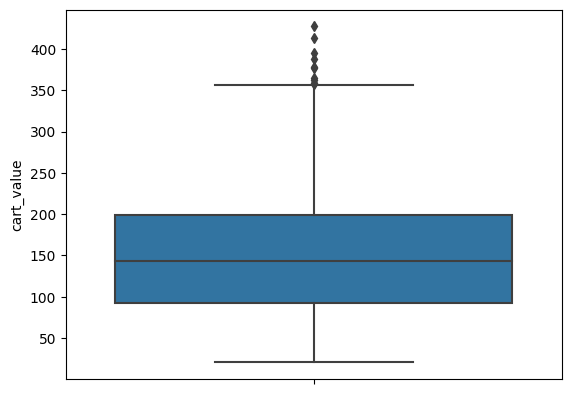

In [125]:
sns.boxplot(data = df, y='cart_value')

It seems that the cart_value column has many outliers, but the obvious ones are cart_value well above 400. We can drop these observations.

In [126]:
# Find index values of observations above 400
drop_cartvalue_outliers = df[df['cart_value']>400].index
drop_cartvalue_outliers

Index([2769, 3200], dtype='int64')

In [127]:
df.drop(drop_cartvalue_outliers, inplace=True)

In [128]:
## 2 entries dropped with 4998 left
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4998 non-null   int64  
 1   age              4998 non-null   int64  
 2   sessions         4998 non-null   int64  
 3   time_spent       4998 non-null   float64
 4   pages_visited    4998 non-null   int64  
 5   cart_items       4998 non-null   int64  
 6   cart_value       4998 non-null   float64
 7   checkout_status  4998 non-null   int64  
 8   device           4998 non-null   object 
 9   location         4998 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.5+ KB


<Axes: ylabel='time_spent'>

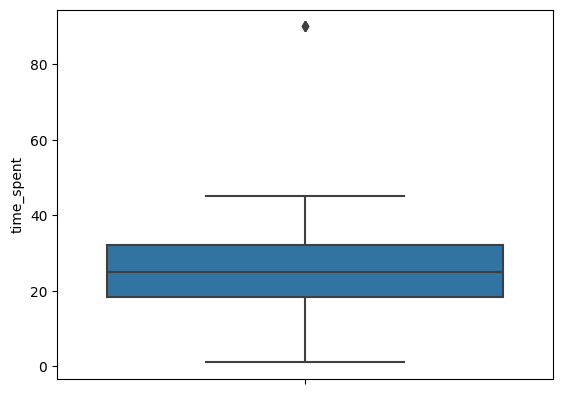

In [129]:
sns.boxplot(data = df, y='time_spent')

It seems that the time_spent column has some outliers, which above 80. We can drop this observation.

In [130]:
drop_time_outliers = df[df['time_spent']>80].index
drop_time_outliers

Index([284, 2494, 2833, 3957], dtype='int64')

In [131]:
df.drop(drop_time_outliers, inplace=True)

In [132]:
# 4 entries dropped with 4994 left
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4994 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4994 non-null   int64  
 1   age              4994 non-null   int64  
 2   sessions         4994 non-null   int64  
 3   time_spent       4994 non-null   float64
 4   pages_visited    4994 non-null   int64  
 5   cart_items       4994 non-null   int64  
 6   cart_value       4994 non-null   float64
 7   checkout_status  4994 non-null   int64  
 8   device           4994 non-null   object 
 9   location         4994 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.2+ KB


Finally, let's drop any duplicate entries.

In [134]:
df.drop_duplicates(inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4994 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4994 non-null   int64  
 1   age              4994 non-null   int64  
 2   sessions         4994 non-null   int64  
 3   time_spent       4994 non-null   float64
 4   pages_visited    4994 non-null   int64  
 5   cart_items       4994 non-null   int64  
 6   cart_value       4994 non-null   float64
 7   checkout_status  4994 non-null   int64  
 8   device           4994 non-null   object 
 9   location         4994 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.2+ KB


We are now finished the data cleaning steps! Our final DataFrame has 4994 entries we can use for analysis. To summarize how we approached cleaning the data:
* We dropped rows that had multiple missing values, which would cause challenges for imputation
* We reviewed missing values in detail, and compared various approaches to imputing data. For the location and device, we assessed whether we should impute with "Other" or the mode - since the mode resulted in value changes, we decided to go with "Other"
* We used a boxplot to identify outliers in the cart_value and time_spent, and removed outliers
* We dropped all duplicate entries

Data Exploration

The purpose of the data exploration stage is to identify  Our objective for the Data Exploration stage is to identify clear patterns or recommendations we can make to the business.

Let's start with univariate analysis. 

For the continuous variables (Price and Units Sold), we can use histograms to understand spread. For categorical variables, we can use counts and bar charts to see which groups are most popular.


In [136]:
import matplotlib.pyplot as plt

<Axes: xlabel='checkout_status', ylabel='Count'>

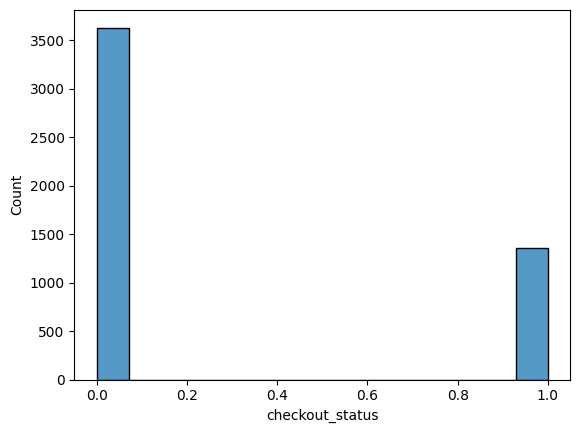

In [138]:
sns.histplot(df['checkout_status'])

In [139]:
from scipy import stats
print(stats.skew(df['checkout_status']))

1.0206207261596576


<Axes: xlabel='time_spent', ylabel='Count'>

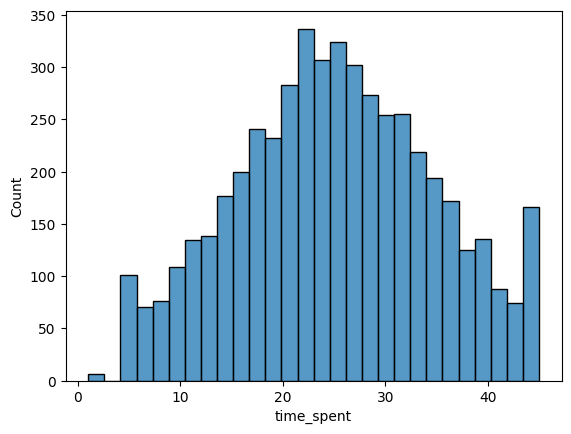

In [140]:
sns.histplot(df['time_spent'])

In [141]:
print(stats.skew(df['time_spent']))
print(stats.kurtosis(df['time_spent']))

0.006498297670922823
-0.5735824975764356


<Axes: xlabel='cart_value', ylabel='Count'>

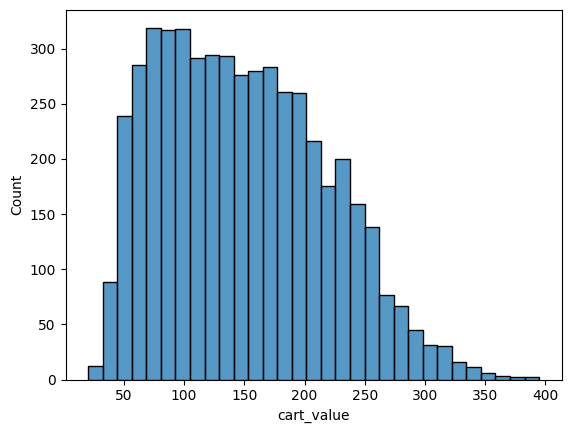

In [142]:
sns.histplot(df['cart_value'])

In [143]:
print(stats.skew(df['cart_value']))
print(stats.kurtosis(df['cart_value']))

0.4267346350052011
-0.5115419305046083


Here, we can see that checkout status have a right skew, means more people did not checkout than people who did check out. TIme spent with a slightly positive skewness and negative kurtosis, denote that the time spent on the product is almost uniform. The skew of artvalue is positive, means that most of the people prefer the cheap iteams, the kurtois is negative, looks like a platykuritic kurtosis, means that the disturibution is wirde and flat.

Now let's check our categorical variables. We will look at counts to see how the data is distributed - we can use groupby() to group by the categorical variable, pick any random column to count the number of entries related to that column, aggregate with count(), sort using sort_values() and use plot() to create a bar chart. I'm adding a figsize parameter which allows me to make the figure a bit bigger and easier to see.

In [146]:
#first we creat a variable for users who check out.
checkout = df[df['checkout_status'] == 1]

In [147]:
# then, we creat a variable for users who  did not check out.
nocheck = df[df['checkout_status'] == 0]

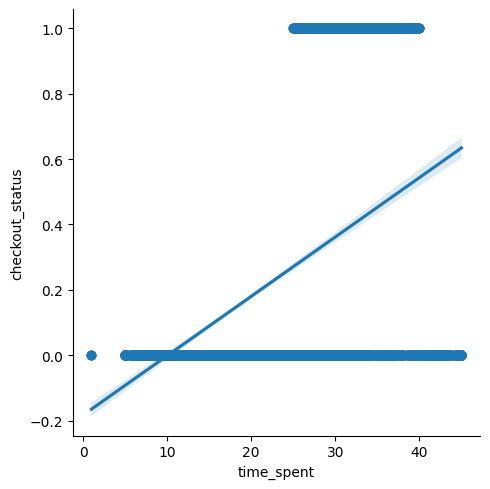

In [150]:
# we want to make sure is there any relationship between checkout status with time_spent and checkout_status.

sns.lmplot(data = df, x='time_spent', y='checkout_status')

we can see that there is a positive realtionship between time_spent and checkout_status, even the people who did not check out are through the entire time spent range from low to high. However people who did check out are mostly prefer to spend more time on browsing the website.

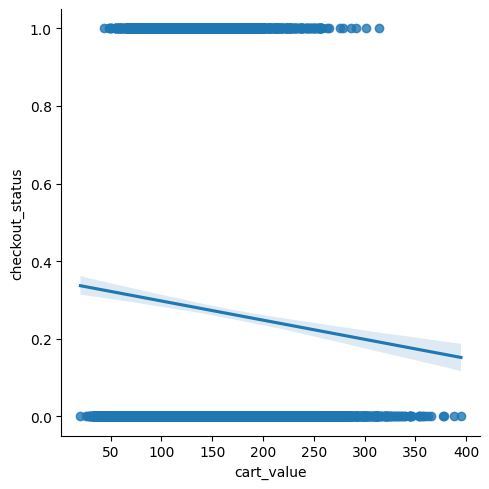

In [151]:
# we want to make sure is there any relationship between checkout status with cart_value and checkout_status.

sns.lmplot(data = df, x='cart_value', y='checkout_status')

we can see that there is a downward sloping which denote a negative realtionship between cart_value and checkout_status, even the people who did not check out are through the entire cart_value range from low to high. However people who did check out are mostly prefer to checkout on cheaper items.

In [152]:
# now I want to figure out the age range of the customers who did the checkout
age_groups = pd.cut(checkout['age'], bins=[0, 18, 30, 40, 50, 60, 100])

age_counts = age_groups.value_counts().sort_index()

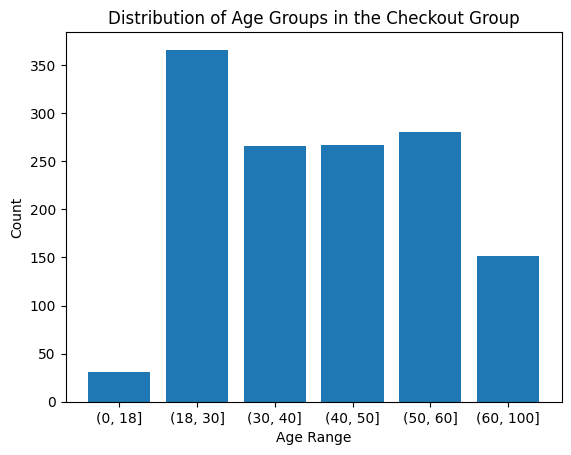

In [154]:
# Visualize age group distribution
plt.bar(age_counts.index.astype(str), age_counts.values)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Distribution of Age Groups in the Checkout Group')
plt.show()

we can see people who did check out, their age are more concentrated from age 18 - age 60. It should be noticed that the cohort with age 18-30 are the largest cohort that choose to checkout ,and the cohort with age 50-60 are the second largest cohort to choose check out. so the product team should more target on these two groups. For example,Push more entertainment-related products, such as games and fitness equipment, to the 18-30 age group. Give more health products to the 50-60 year olds。 Because these two groups are the most sensitive to such products and they are more willing to do the checkout.

In [163]:
df['cart_value_category'] = pd.cut(df['cart_value'], bins=[0, 50, 100, 150, 200, 250, float('inf')],
                                    labels=['<50', '50-100', '100-150', '150-200', '200-250', '250+'])

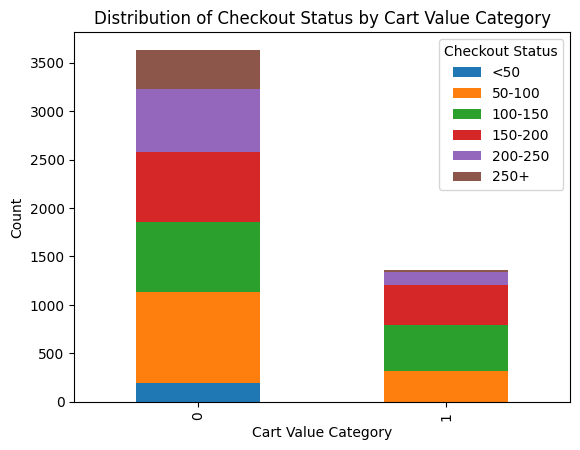

In [164]:
checkout_counts3 = df.groupby(['checkout_status', 'cart_value_category']).size().unstack()


checkout_counts3.plot(kind='bar', stacked=True)


plt.xlabel('Cart Value Category')
plt.ylabel('Count')
plt.title('Distribution of Checkout Status by Cart Value Category')


plt.legend(title='Checkout Status', loc='upper right')


plt.show()



Here, we can see that the cart_value with 150-200 and 100-150 are most likely to get checkout, so the product team should be more foucused on push the product with value in these two ranges.